# Amazon_Grocery and Gourmet _ Data preparation + training

In [80]:
import time
import pandas as pd
df = pd.read_json('Grocery_and_Gourmet_Food_5.json', lines=True)

In [81]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste is unique and a bit different. The only thing that is bothersome is the price. I thought it was a bit expensive....,4,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]","I bought this on impulse and it comes from Japan, which amused my family, all those weird stamps and markings on the package. So that was fun. It said it would take about a month to arrive and it did take that long. I was hoping for a more interesting taste but to our family, it just tasted a bit less flavorful or weaker than the standard milk chocolate kit kat. The green tea flavor was too subtle for the sugar and it just tasted sweet. The wafers were very crispy, and that was good, but it tasted a bit anemic to us.I'm happy I bought it, but don't need to buy it again.",3,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green tea! Just so expensive to purchase candy from across the sea.,4,Yum!,1381190400,"10 8, 2013"
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see what it was like. Smooth, great subtle good flavor. I am ordering more and plan to make it a routine.",5,Unexpected flavor meld,1369008000,"05 20, 2013"
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]","I've been looking forward to trying these after hearing about how popular they were in Japan, and among Kit Kat fans as well. I do not recommend ordering these during warm weather, because they can melt and become smushy. I ordered mine right when summer began, and they were a bit mushy so I let them solidify under room temp. Afterwards, I tried some and they tasted fine. I was expecting a stronger green tea or matcha flavor, but it is actually quite subtle. The outer coating was creamy and not overly sugary, which I liked. Overall, I wouldn't say it's insanely good, but definitely a yummy...",4,"Not a very strong tea flavor, but still yummy & creamy!",1369526400,"05 26, 2013"


In [82]:
df.shape

(151254, 9)

Validating the "helpful" column

In [83]:
df["helpful"].apply(lambda x: len(x)).value_counts()

2    151254
Name: helpful, dtype: int64

In [84]:
df["overall"].value_counts()

5    87446
4    32598
3    17514
2     7917
1     5779
Name: overall, dtype: int64

Dropping columns that we don't need:

In [85]:
df.drop(columns=["reviewerID", "asin", "reviewerName", "unixReviewTime", "reviewTime"], inplace=True)

In [86]:
df.shape

(151254, 4)

Now we have these datatypes:

In [87]:
df.dtypes

helpful       object
reviewText    object
overall        int64
summary       object
dtype: object

Adding new columns for helpful votes, ratio and total votes:

In [88]:
start = time.time()

df["num_helpful_votes"] = df["helpful"].apply(lambda x: float(x[0]))
df["num_total_votes"] = df["helpful"].apply(lambda x: float(x[1]))
df["helpful_ratio"] = df["num_helpful_votes"] / df["num_total_votes"]

end = time.time()
elapsed = end - start
print(elapsed)

0.17744874954223633


In [89]:
df = df.astype({'num_helpful_votes': 'int32', 'num_total_votes': 'int32'})

In [90]:
df.dtypes

helpful               object
reviewText            object
overall                int64
summary               object
num_helpful_votes      int32
num_total_votes        int32
helpful_ratio        float64
dtype: object

 Replacing NaN with 0:

In [91]:
df['helpful_ratio'].fillna(0, inplace=True)

In [92]:
df.head()

,helpful,reviewText,overall,summary,num_helpful_votes,num_total_votes,helpful_ratio
0,"[0, 0]",Just another flavor of Kit Kat but the taste is unique and a bit different. The only thing that is bothersome is the price. I thought it was a bit expensive....,4,Good Taste,0,0,0.00
1,"[0, 1]","I bought this on impulse and it comes from Japan, which amused my family, all those weird stamps and markings on the package. So that was fun. It said it would take about a month to arrive and it did take that long. I was hoping for a more interesting taste but to our family, it just tasted a bit less flavorful or weaker than the standard milk chocolate kit kat. The green tea flavor was too subtle for the sugar and it just tasted sweet. The wafers were very crispy, and that was good, but it tasted a bit anemic to us.I'm happy I bought it, but don't need to buy it again.",3,"3.5 stars, sadly not as wonderful as I had hoped",0,1,0.00
2,"[3, 4]",Really good. Great gift for any fan of green tea! Just so expensive to purchase candy from across the sea.,4,Yum!,3,4,0.75
3,"[0, 0]","I had never had it before, was curious to see what it was like. Smooth, great subtle good flavor. I am ordering more and plan to make it a routine.",5,Unexpected flavor meld,0,0,0.00
4,"[1, 2]","I've been looking forward to trying these after hearing about how popular they were in Japan, and among Kit Kat fans as well. I do not recommend ordering these during warm weather, because they can melt and become smushy. I ordered mine right when summer began, and they were a bit mushy so I let them solidify under room temp. Afterwards, I tried some and they tasted fine. I was expecting a stronger green tea or matcha flavor, but it is actually quite subtle. The outer coating was creamy and not overly sugary, which I liked. Overall, I wouldn't say it's insanely good, but definitely a yummy...",4,"Not a very strong tea flavor, but still yummy & creamy!",1,2,0.50


Dropping dupes:

In [93]:
df_uniq = df.drop_duplicates(subset="reviewText", keep = "first")

Classification dataset threshold. Whether a review should be included in the classification task. Following the literature, we are using 50 votes. 
(df_uniq can be used for LM fine tuning (it contains all reviews except dupes))

In [94]:
df_uniq_cl = df_uniq[df_uniq['num_total_votes'] > 49 ]

In [95]:
df_uniq_cl.head()

,helpful,reviewText,overall,summary,num_helpful_votes,num_total_votes,helpful_ratio
102,"[50, 50]","First a little background on me. I Am a coffee drinking fiend. I probably keep several countries coffee production up, so I know coffee. I don't mind strong coffee or so so tasting coffee I just dont expect it to be expensive so so tasting coffee. I have had and love Jamaican Blue mountain coffee before but it was a lot more expensive than this. This came in a cute little burlap sack (you get some style points there) but after that it's pretty much down hill. The coffe is not the normal rich tasting wonderfull smelling JBM I have had before, it just tastes like every other coffee albeit at...",3,Not worth it for the money,50,50,1.000000
106,"[68, 74]","EASY OF USEI've used the Mellita Coffee System for about 40 years. I find the system more convenient than coffee machines.> If the power goes off, you can still make coffee if you have a gas stove or a camp stove.> It is easy to brew exactly the amount of coffee you want, and exactly the strength that you want---including adjusting to new roast and grinds. You can even mix caffeinated and decaffeinated coffees if you wish.> In a way, the Mellita system is more ""sanitary"". It is easy to forget a used filter in a coffee maker, maybe for weeks if you go on a vacation, and find a fungus garde...",5,Does the job,68,74,0.918919
124,"[130, 130]","I've taken to making cupcakes and cookies and making icing letters on them... you know, an ""H"" on one cookie, ""A"" on another, and so forth, and arrange the cookies or cupcakes to spell out HAPPY BIRTHDAY or whatever the occasion might be. I prefer bold, rich colors, like jewel tone colors, so these gel colors fit the bill to get the bold color without watering down my icing. Only takes a few toothpicks of color to get what I'm looking for, so each 1/2 ounce color is going to go a long way. A good buy, all around. I will never go back to regular liquid food coloring!Also, I know others...",5,I love these to get a BOLD color,130,130,1.000000
127,"[78, 81]","As an experienced baker for decades, I have used gel, paste, liquid, and powder artificial colorings. For the best control, I prefer the gels and powders. Whether doing royal, butter cream, color flow, fondant, or marzipan, the gel gives me an immediate, true color. I have been a Wilton customer for 30 years and will not use another brand.Tips: When opening each little jar, DO NOT fully remove the foil cover over the product. Insert a wooden tooth pick to open a small hole. Unless you are making a large quantity of icing, you won't need to widen it and remove more than what is on you...",5,Color Me Happy,78,81,0.962963
240,"[81, 86]","The first tree I ordered was badly scarred by wires. The company replaced it quickly with a very nice tree that had a great shape. The ficus is great if you have little natural light. My apartment is very dark and the tree did fine off of the artificial light. That said, this is NOT a tree for beginners. Ficus are notoriously finicky. They like regular water and the same light conditions day after day. Each time you vary the routiine significantly, it will drop all of its leaves. Moreover, this plant was hard to water. The pot doesn't have enough room for the water to soak in, so ...",3,"Misleading description, but nice plant.",81,86,0.941860


BALANCING + BINNING THE DATA

In [96]:
bins = [0.0, 0.75, 1.0]
df_uniq_cl["is_helpful"] = pd.cut(df_uniq_cl["helpful_ratio"], bins, labels=["0", "1"])

<ipython-input-96-c0b181f165c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uniq_cl["is_helpful"] = pd.cut(df_uniq_cl["helpful_ratio"], bins, labels=["0", "1"])


In [97]:
df_uniq_cl["is_helpful"].value_counts()

1    455
0     62
Name: is_helpful, dtype: int64

Equal number for helpful and unhelpful votes data

In [98]:
all_unhelpful = df_uniq_cl.loc[df_uniq_cl["is_helpful"] == "0"]

In [99]:
all_unhelpful['is_helpful'].value_counts()

0    62
1     0
Name: is_helpful, dtype: int64

In [100]:
all_helpful = df_uniq_cl.loc[df_uniq_cl["is_helpful"] == "1"].sample(n=62, random_state=42, axis=0)

In [101]:
all_helpful["is_helpful"].value_counts()

1    62
0     0
Name: is_helpful, dtype: int64

In [102]:
balanced_df = all_helpful.append(all_unhelpful)

In [103]:
balanced_df['is_helpful'].value_counts()

1    62
0    62
Name: is_helpful, dtype: int64

Now we split into test and train data (borrowing' Gaurav's approach here)

In [104]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(balanced_df, test_size=0.20, stratify=balanced_df["is_helpful"], random_state=42)

train_df.shape, test_df.shape

((99, 8), (25, 8))

Create csv files

In [105]:
train_df.to_csv("grocery_and_gourmet_train.csv", header=True, index=False)
test_df.to_csv("grocery_and_gourmet_test.csv", header=True, index=False)

In [106]:
df_uniq_cl.to_csv("grocery_and_gourmet_classifier_uniq.csv", index=False)

In [107]:
df_uniq_cl.to_csv("grocery_and_gourmet_all_classifier_data_unbalanced_uniq.csv", index=False)

Dropping what we don't need again:

In [108]:
df_uniq_LM = df_uniq.drop(["helpful","overall",'num_helpful_votes','num_total_votes','helpful_ratio'], 1)

In [109]:
df_uniq_LM.head()

,reviewText,summary
0,Just another flavor of Kit Kat but the taste is unique and a bit different. The only thing that is bothersome is the price. I thought it was a bit expensive....,Good Taste
1,"I bought this on impulse and it comes from Japan, which amused my family, all those weird stamps and markings on the package. So that was fun. It said it would take about a month to arrive and it did take that long. I was hoping for a more interesting taste but to our family, it just tasted a bit less flavorful or weaker than the standard milk chocolate kit kat. The green tea flavor was too subtle for the sugar and it just tasted sweet. The wafers were very crispy, and that was good, but it tasted a bit anemic to us.I'm happy I bought it, but don't need to buy it again.","3.5 stars, sadly not as wonderful as I had hoped"
2,Really good. Great gift for any fan of green tea! Just so expensive to purchase candy from across the sea.,Yum!
3,"I had never had it before, was curious to see what it was like. Smooth, great subtle good flavor. I am ordering more and plan to make it a routine.",Unexpected flavor meld
4,"I've been looking forward to trying these after hearing about how popular they were in Japan, and among Kit Kat fans as well. I do not recommend ordering these during warm weather, because they can melt and become smushy. I ordered mine right when summer began, and they were a bit mushy so I let them solidify under room temp. Afterwards, I tried some and they tasted fine. I was expecting a stronger green tea or matcha flavor, but it is actually quite subtle. The outer coating was creamy and not overly sugary, which I liked. Overall, I wouldn't say it's insanely good, but definitely a yummy...","Not a very strong tea flavor, but still yummy & creamy!"


In [110]:
df_uniq_LM.to_csv("grocery_and_gourmet_training_uniq.csv", index=False)

We are going to create folders for training:

In [111]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from IPython.display import display,HTML
import pandas as pd

In [112]:
df_train = pd.read_csv("grocery_and_gourmet_train.csv")
df_test = pd.read_csv("grocery_and_gourmet_test.csv")

The data looks like this:

In [113]:
df_test.head()

,helpful,reviewText,overall,summary,num_helpful_votes,num_total_votes,helpful_ratio,is_helpful
0,"[41, 51]","This YS Honey is not organic but is the best line of honey YS sells in different jars in different sizes. I purchase this line of YS sold in many sites for reasonable price. The only trick of this honey is I never place it in the sun to get it runny since that kills all the health benefits of the honey, I just consume it directly out of the can with a spoon and when it is as solid as rock which is how it should be shipped to consumers, I can fill how UNFILTERED this honey is since I feel the bumps, the wax in hive and that is what raw unfiltered honey should taste and feel like.REAL HONEY:...",4,Solid as Rock...,41,51,0.803922,1
1,"[19, 50]",In the past I've used pure vanilla extract and vanilla beans which are expensive. However good vanilla tastes great and that's why I ordered this. It read McCormick PURE vanilla. To me that should mean only vanilla extracted from the full grown unripe fruit of the vanilla plant.I thought I was getting a bargain at $12 for 16 ounces of vanilla. When it arrived and I used it to make a protein shake I was shocked. One sip and I knew I had to throw away the shake. It tasted disgusting just as if it was spoiled. The first thing I noticed after using a teaspoon of this so called vanilla is that ...,1,disgusting,19,50,0.380000,0
2,"[154, 161]","Bob's Red Mill TVP is priced at $ 9.48 (for 5% off subscribers) for a 4-pack deal on 10oz bags. That's 23.7 cents per ounce.Bob's Red Mill TSP is priced at $28.24 (for 5% off subscribers) for a 4-pack deal on 13oz bags. That's 54.3 cents per ounce.Thus, TSP is 2.29 times more expensive per ounce than TVP.TVP (textured vegetable protein) is not organic. Only ingredient: ""Defatted soy flour""TSP (textured soy protein) is certified organic. Only ingredient: ""Organic soy""TVP probably contains about 3 to 4 times as much hexane as soybean oil. Archer Daniels Midland, the makers of TVP, pre...",4,"Let's compare this product, Bob's Red Mill TVP, against Bob's Red Mill TSP",154,161,0.956522,1
3,"[62, 95]","Although olive oil is healthy for you, I guess I've never found one I really loved the flavor of--either NO flavor or tastes a bit like paint thinner--or the price was astronomical; whatever the case I'd become quite frustrated in my search. Then I learned that when an oil smokes, it releases carcinogens into the air and free radicals within the oil. Olive oil should NOT be heated beyond 325 degrees F. So, in searching for an oil with a higher smoke point PLUS staying within a ""paleo"" eating way of life I discovered Avocado Oil. This is my new holy grail of oils: it's got a smoke poin...",5,This is really a 10-STAR item--go buy it right now!,62,95,0.652632,0
4,"[19, 61]","Really these are just cut up oats. They taste like rather a cross between rolled oats and farina. For my money, Quaker Oats beats it.",1,"There's always one wet blanket, isn't there?",19,61,0.311475,0


In [114]:
df_train.head()

,helpful,reviewText,overall,summary,num_helpful_votes,num_total_votes,helpful_ratio,is_helpful
0,"[118, 120]","This is the authentic product, I can vouch for it since I am from India. The ITC Hotel chefs who created this recipe are very well regarded in India. Its just the right mix for a spicy lamb curry, all you need to do is mix it with water and add the lamb and then let it simmer on your stove for 30-45 minutes to bring out the aromas and flavors. Really convenient and time saving.The lamb curry paste is spicier than a butter chicken curry mix. The chicken curry usually has a more creamy consistency and is sweeter due to higher content of tomatoes. The lamb curry has a base of garlic, ginger, ...",5,"Very authentic and spicy, tastes great with some basmati rice, great for beef too.",118,120,0.983333,1
1,"[38, 63]","It was quite amazing that after I gave Solofill a one STAR rating I was being gang-attacked with names calling by some of the Amazon.com reviewers here. It made me wonder why they were so zealous to the point that they had to attack others who did not agree with them? Luckily, there were also two people who spoke out on my behalf and that is why I believe this is the greatest county (U.S.A.) to live.Well, I decided to edit my review, not because of all these NEGATIVE pressure but because the Solofill customer service finally made things right for my previous order and also sent me a free ...",4,A second look at Solofill !,38,63,0.603175,0
2,"[102, 108]","PURE, UNPASTEURIZED, UNFILTERED, ORGANIC, KOSHER, RAW HONEYLove it, love it, love it.I rarely recommend buying something that's more expensive than any ""regular"" type, but organic is well worth it as far as I'm concerned. Any time you can afford organic I believe it's worth the extra money because it's all about your health, not just taste. Everything you eat affects your health. You either pay extra now for the good stuff, or you pay a lot more later in the way of doctor bills and possibly even an early death.I get raw (unheated, never heat treated) honey from a friend now and then, she h...",5,Better than having your own bee hive!,102,108,0.944444,1
3,"[46, 53]","I was particularly excited to try Emerald Cocoa Roast Almonds when they arrived in the mail today as I love chocolate and I love nuts.Five individuals ranging in age from 2 to 50 tried these together and shared feedback. A few common threads emerged.1. Chocolate doesn't come off on your hands: Very convenient as there is almost no residue left on hands even after holding a handful of nuts for a minute.2. Very subtle chocolate flavor: For some this is a plus and for some this is a negative. You know the chocolate is there, but in my opinion it just leave you wanting more chocolate. I couldn...",3,"Lots of Nut, Little Chocolate; Mixed Results",46,53,0.867925,1
4,"[80, 110]","Even though I write reviews mostly on my favorite types of escape novels, I was sparked by Amazon's enthusiasm, to take part in the grocery store and gourmet food expansions here. My first purchase (of products beyond books) included a grain called QUINOA (Keenwa), on a Super Saver Shipping.The product arrived in very good order and within perfect timing.In that maiden purchase (which included a novel, of course, Cleo Coyle's latest coffeehouse mystery, MURDER MOST FROTHY), I also added lavender and clove essential oils to my shopping cart, along with powdered cloves, and lavender tea. S...",5,Quinoa is Nutty (Yummy) like Barley; Sage like Ancient Vines Lost from Long Ago Times.,80,110,0.727273,0


In [115]:
df_new = df_test.head()

In [116]:
df_new.shape

(5, 8)

Populating data folders and data directory structure

In [117]:
def populate_data_folders(row, main_dir, task):
    
    name = str(row.name) + ".txt"
    if row['is_helpful'] == 1:
        file_path = (main_dir/task/"helpful"/name)
        file_path.write_text(row["reviewText"])
    elif row['is_helpful'] == 0:
        file_path = (main_dir/task/"unhelpful"/name)
        file_path.write_text(row['reviewText'])
    else:
        print("Check line {}".format(row.name))

In [118]:
top_dir = Path("data")

if not top_dir.exists():
    top_dir.mkdir()
    for t in ["test","train"]:
        path_t = top_dir/t
        path_t.mkdir()
        for l in ["helpful", "unhelpful"]:
            path_l = path_t/l
            path_l.mkdir()

In [119]:
df_test.apply(populate_data_folders, main_dir = top_dir, task = "test", axis=1)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
dtype: object

In [120]:
df_train.apply(populate_data_folders, main_dir = top_dir, task = "train", axis=1)

0     None
1     None
2     None
3     None
4     None
      ... 
94    None
95    None
96    None
97    None
98    None
Length: 99, dtype: object

In [121]:
from fastai.text.all import *

In [122]:
path = Path("data")
path.ls()

(#3) [Path('data/train'),Path('data/models'),Path('data/test')]

In [123]:
get_files = partial(get_text_files, folders=['train', 'test'])

dls_lm = DataBlock(
    blocks=TextBlock.from_folder(path, is_lm=True),
    get_items=get_files, splitter=RandomSplitter(0.1)
).dataloaders(path, path=path, bs=128, seq_len=80)

In [124]:
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3, 
    metrics=[accuracy, Perplexity()]).to_fp16()

In [127]:
learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.100916,4.505882,0.210737,90.548195,00:01


We want to find the optimal learning rate by plotting the loss against the learning rate:

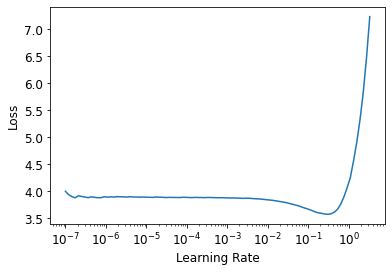

In [128]:
lr_min,lr_steep = learn.lr_find()

Unfreeze, save and load:

In [129]:
learn.save('1epoch')

Path('data/models/1epoch.pth')

In [130]:
learn.load('1epoch');

After unfreezing, finetuning 

In [131]:
learn.unfreeze()
learn.fit_one_cycle(5, 2e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.900153,4.405414,0.215946,81.893051,00:01
1,3.818004,4.380050,0.214744,79.842003,00:01
2,3.683079,4.312737,0.217348,74.644478,00:01
3,3.543440,4.342031,0.211538,76.863487,00:01
4,3.430624,4.343682,0.213141,76.990486,00:01


I think 3 epochs is the ideal (encoder= except for the final layer)

In [132]:
learn.save_encoder('finetuned')

Creating the classifier DataLoaders- Create the language model by using DataBlock. From finetuning to pretrained model for classification 
(vocab=dls_lm.vocab uses the vocab we have from the language model (indep var))

In [52]:
dls_clas = DataBlock(
    blocks=(TextBlock.from_folder(path, vocab=dls_lm.vocab),CategoryBlock),
    get_y = parent_label,
    get_items=partial(get_text_files, folders=['train', 'test']),
    splitter=GrandparentSplitter(valid_name='test')
).dataloaders(path, path=path, bs=24, seq_len=72)

In [53]:
dls_clas.show_batch(max_n=4)

,text,category
0,"xxbos xxunk : very nearly like xxunk great in cold xxunk for hot beverages ( see xxunk xxunk ' cooling xxunk xxunk in a baking xxunk xxunk , chemical xxunk : contains xxunk amounts of sugar and xxunk "" but not necessarily non - xxunk exactly zero calories ( greater than two servings likely greater than 5 xxunk slightly bitter aftertaste in hot xxunk honey - like overtones added to the xxunk ' natural ' xxunk is xxunk : it contains some refined sugar and is not necessarily from non - gmo xxunk : xxmaj please realize that when xxunk any food item , including sweeteners , i can only give my opinion . xxmaj everyone 's taste xxunk are different and everyone 's xxunk of what tastes good in a sweetener is different . i have done my best to xxunk this product , but in the end you",helpful
1,"xxbos xxmaj it was quite amazing that after i gave xxmaj solofill a one xxup star rating i was being xxunk - xxunk with xxunk calling by some of the xxmaj xxunk reviewers here . xxmaj it made me wonder why they were so xxunk to the point that they had to attack others who did not agree with them ? xxmaj luckily , there were also two people who xxunk out on my xxunk and that is why i believe this is the xxunk xxunk ( xxunk . ) to xxunk , i decided to xxunk my review , not because of all these xxup negative pressure but because the xxmaj solofill customer service finally made things right for my xxunk order and also sent me a free replacement xxmaj solofill cup ( after they checked it out ) to re - xxunk . xxmaj if i rate the",unhelpful
2,"xxbos xxmaj even though i write reviews mostly on my favorite types of xxunk xxunk , i was xxunk by xxmaj amazon 's xxunk , to take part in the grocery store and gourmet food xxunk here . xxmaj my first purchase ( of products beyond books ) included a grain called xxup quinoa ( xxunk product arrived in very good order and within perfect xxunk that xxunk purchase i also added lavender and xxunk essential oils to my xxunk cart , along with powdered cloves , and lavender tea . xxmaj see my xxmaj xxunk on xxmaj essential xxmaj oils ( which xxunk which items xxmaj i 've reviewed ) for info on the values and uses of lavender and cloves , available from various xxunk xxunk consider xxmaj quinoa to be the most xxunk food available on the xxunk , a food which meets my xxunk for xxunk",unhelpful
3,"xxbos xxmaj even though i write reviews mostly on my favorite types of xxunk xxunk , i was xxunk by xxmaj amazon 's xxunk , to take part in the grocery store and gourmet food xxunk here . xxmaj my first purchase ( of products beyond books ) included a grain called xxup quinoa ( xxunk ) , on a xxmaj super xxmaj xxunk xxunk product arrived in very good order and within perfect xxunk that xxunk purchase ( which included a xxunk , of course , xxmaj xxunk xxmaj xxunk 's xxunk xxunk xxunk , xxup xxunk xxup most xxup xxunk ) , i also added lavender and xxunk essential oils to my xxunk cart , along with powdered cloves , and lavender tea . xxmaj see my xxmaj xxunk on xxmaj essential xxmaj oils ( which xxunk which items xxmaj i 've reviewed ) for info on the",unhelpful


In [54]:
learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, 
                                metrics=accuracy).to_fp16()

In [55]:
learn = learn.load_encoder('finetuned')

Fine-tuning the classifier. The last step: train with discriminative learning rates and gradual unfreezing(for NLP classifiers it is better to unfreeze a few layers only). In this case, we only use the final layer, a randomly added classifier layer:

In [56]:
learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.917979,0.964837,0.480000,00:02


Now we unfreeze the last couple of layer groups:

In [57]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.589943,0.687495,0.560000,00:02


Unfreezing more layers...

In [58]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.412093,0.666982,0.680000,00:03


In [60]:
learn.freeze_to(-5)
learn.fit_one_cycle(1, slice(1e-5/(2.6**4),1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.320203,0.655751,0.760000,00:03


Now the whole model:

In [61]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.324160,0.642505,0.800000,00:03


At the end we've got 80% accuracy on balanced data !!

---- NOW LET'S HAVE SOME FUN!! Side experiment about REVIEW GENERATION. Our model can be used to generate random reviews since it's trained to GUESS what the next word of the sentence is.  We can use it to write new reviews. Here are some examples:

In [181]:
path = Path('data/train')
df = pd.read_csv("grocery_and_gourmet_train.csv")
dls = TextDataLoaders.from_df(df, path=path, text_col='reviewText', is_lm=True)
learn = language_model_learner(dls, AWD_LSTM)

/opt/conda/envs/fastai/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [187]:
learn.predict('This product is too sweet and ', n_words=30)

'This product is too sweet and this is a common cause of the reduced - content quality of the US product , both the US and US . " The whole "'

In [176]:
TEXT = "This product has a really good taste and "
N_WORDS = 50
N_SENTENCES = 3
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75)
        for _ in range(N_SENTENCES)]

In [177]:
print("\n".join(preds))

This product has a really good taste and is not a highly recommended and well - known example . However , it has been found to be a common choice to use in the commercial business that is considered the most common product in Japanese - Japanese . The quality of the product has
This product has a really good taste and is not quite easy for the US to keep , and it has also been said that even the best - selling products are found . The US Mint has been considering the choice of " Your Own Life " as the product
This product has a really good taste and is considered a bad word , but it is a low quality . The Japanese People 's Choice Word List has called the Japanese " Japanese Japanese " " the most important slice of the US " . The
